## Import and download the neccessary libraries

In [2]:
import pandas as pd
from textblob import TextBlob
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('movie_reviews')
nltk.download('wordnet')
nltk.download('stopwords')

from textblob.sentiments import NaiveBayesAnalyzer
from pathlib import Path
from google.colab import files
from nltk.corpus import stopwords
import imageio
from wordcloud import WordCloud
from google.colab import drive

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Connect to google drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Load our text using TextBlob (the selected book is "The Picture of Dorian Gray")

In [4]:
data_dir = '/content/drive/MyDrive/Datasets/'
blob = TextBlob(Path(data_dir + 'ThePictureOfDorianGray.txt').read_text())

## First, we analyze the overall emotional coloring of the text, and then we select 20 sentences (60-79) and analyze each of them

In [11]:
overall_sentiment = blob.sentiment

sentences = blob.sentences[60:80]

print("Emotional coloring of the whole text:", overall_sentiment)
print("\nEmotional coloring of 20 different sentences:")
for i, sentence in enumerate(sentences):
    print(f"Sentence #{i + 1}: {sentence.sentiment}")

Emotional coloring of the whole text: Sentiment(polarity=0.07108440059271316, subjectivity=0.5421449337878227)

Emotional coloring of 20 different sentences:
Sentence #1: Sentiment(polarity=0.0, subjectivity=0.425)
Sentence #2: Sentiment(polarity=0.07291666666666666, subjectivity=0.43500000000000005)
Sentence #3: Sentiment(polarity=0.3, subjectivity=0.1)
Sentence #4: Sentiment(polarity=-0.05, subjectivity=0.75)
Sentence #5: Sentiment(polarity=1.0, subjectivity=0.3)
Sentence #6: Sentiment(polarity=0.10714285714285714, subjectivity=0.2857142857142857)
Sentence #7: Sentiment(polarity=-0.24285714285714283, subjectivity=0.6142857142857143)
Sentence #8: Sentiment(polarity=0.09999999999999999, subjectivity=0.6416666666666667)
Sentence #9: Sentiment(polarity=0.06666666666666668, subjectivity=0.31)
Sentence #10: Sentiment(polarity=-0.15000000000000002, subjectivity=0.48750000000000004)
Sentence #11: Sentiment(polarity=0.0, subjectivity=0.0)
Sentence #12: Sentiment(polarity=0.0, subjectivity=0.0

As we see, overall emotional coloring of the text is neutral (0.07), and coloring of different sentences vary quite a lot.

## Purposefully made mistakes in the sentence and checked the likelihood of their correction

In [12]:
print("Sentence to edit:\nAs soon as you have one, you seem to want to throw it away.\n")
sentence_with_errors = TextBlob("As son as yuu haves one, you seam to want to thgrow it away.")

for word in sentence_with_errors.words:
  print("Word: " + word)
  print(word.spellcheck())
  print()

Sentence to edit:
As soon as you have one, you seem to want to throw it away.

Word: As
[('Is', 0.4043019648397104), ('As', 0.33356773526370215), ('S', 0.23313340227507756), ('Us', 0.028293691830403308), ('Vs', 0.00037228541882109616), ('Os', 0.00012409513960703205), ('Es', 0.00012409513960703205), ('Ms', 8.27300930713547e-05)]

Word: son
[('son', 1.0)]

Word: as
[('as', 1.0)]

Word: yuu
[('you', 1.0)]

Word: haves
[('have', 0.9781573788854663), ('haven', 0.010921310557266872), ('waves', 0.004480537664519743), ('hayes', 0.0033604032483898066), ('halves', 0.0014001680201624195), ('hives', 0.0005600672080649678), ('hares', 0.0005600672080649678), ('saves', 0.0002800336040324839), ('eaves', 0.0002800336040324839)]

Word: one
[('one', 1.0)]

Word: you
[('you', 1.0)]

Word: seam
[('seat', 0.35639412997903563), ('seem', 0.2431865828092243), ('sea', 0.1719077568134172), ('seas', 0.07756813417190776), ('steam', 0.06289308176100629), ('seal', 0.031446540880503145), ('team', 0.016771488469601678

As we see, some of the word are likely to be corrected, but others like "son" wasn't found to have any mistake or option to replace

## Download a wordcloud template (a picture of a pumpkin in our case) and creat a wordcloud using "twilight" color map

In [9]:
text = blob.string

image = imageio.imread(data_dir + 'pumpkin.jpg')
stops = stopwords.words("english")

wordcloud = WordCloud(colormap="twilight", mask=image, stopwords=stops, background_color="white")

wordcloud = wordcloud.generate(text)

## Show the result

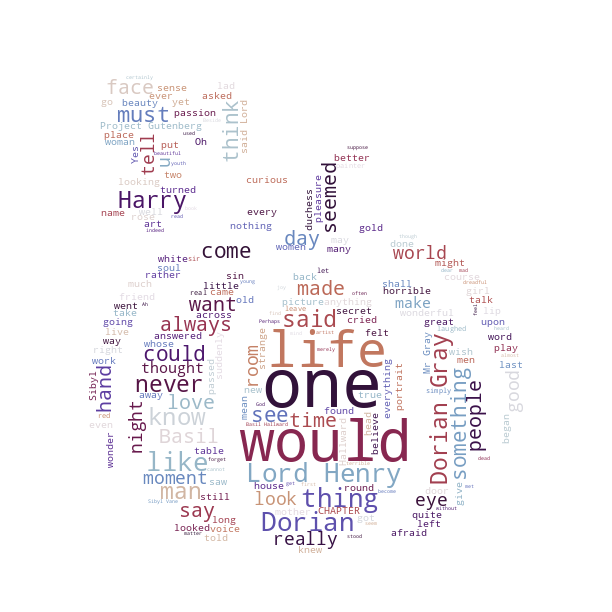

In [10]:
from IPython.display import Image

wordcloud = wordcloud.to_file("pumpkin.png")
Image("pumpkin.png")